By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/05

Videos:
* [[10分鐘搞懂機器學習] 6.1 多功能機器學習模型-支援向量機 Support Vector Machine SVM 線性支援向量機分類](https://youtu.be/u1zthVRTfe8?si=NBoji0nCe8xPHknq)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


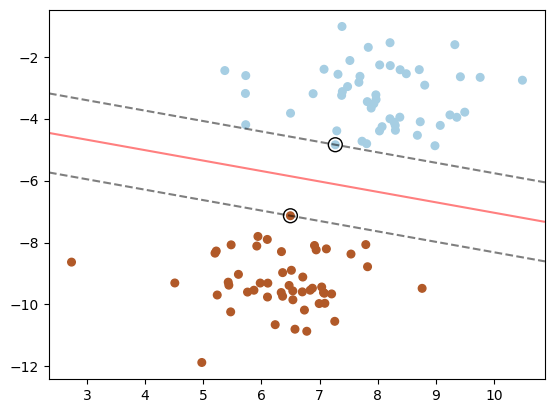

In [ ]:
# 支援向量機分類用圖
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. 生成數據集
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# 2. 訓練SVM模型
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# 3. 圖示化分類結果、決策邊界、間隔和支援向量
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 獲取決策邊界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 建立網格以評估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 繪製決策邊界和間隔
ax.contour(XX, YY, Z, colors=['k', 'red', 'k'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 突出支援向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()


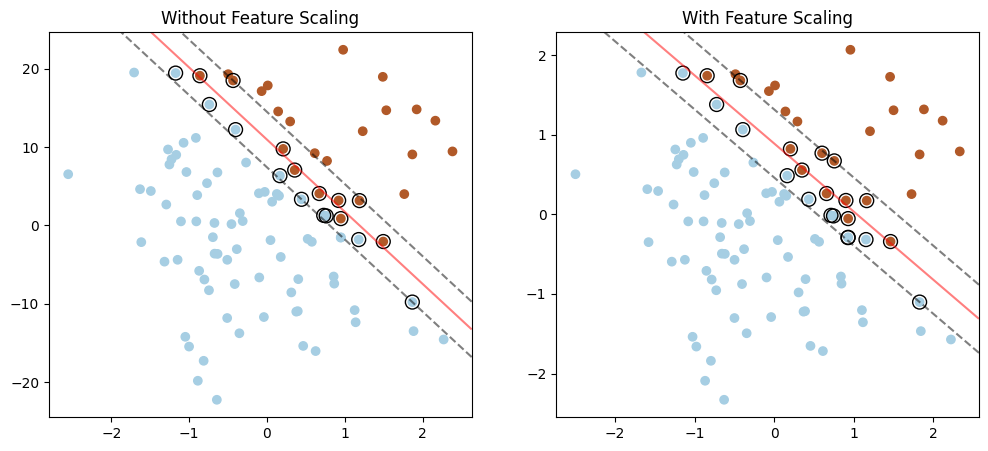

In [ ]:
# 軟間隔和硬間隔分類
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 產生隨機資料集
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, 0)

# 將第二個特徵的尺度放大
X[:, 1] *= 10

# 創建SVM分類器（未縮放）
clf_unscaled = SVC(kernel='linear')
clf_unscaled.fit(X, y)

# 創建SVM分類器（縮放後）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
clf_scaled = SVC(kernel='linear')
clf_scaled.fit(X_scaled, y)

# 繪製決策邊界和數據點
plt.figure(figsize=(12, 5))

# 未縮放數據集
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_unscaled.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'red', 'k'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.title('Without Feature Scaling')
# 標示支援向量
plt.scatter(clf_unscaled.support_vectors_[:, 0], clf_unscaled.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# 縮放後的數據集
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_scaled.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'red', 'k'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.title('With Feature Scaling')
# 標示支援向量
plt.scatter(clf_scaled.support_vectors_[:, 0], clf_scaled.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()


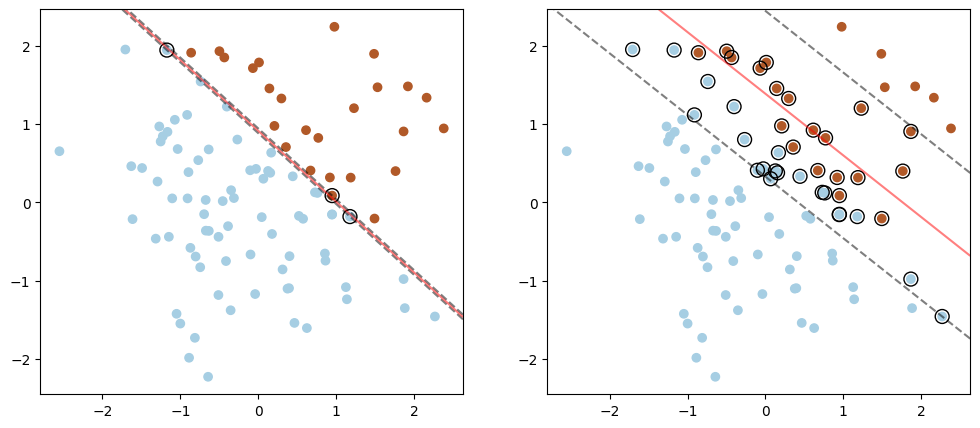

In [ ]:
# 對特徵尺度敏感
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 產生隨機數據集
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)  # 為了方便，將y標籤改為1和-1

# 創建硬邊緣SVM模型
clf_hard = SVC(kernel='linear', C=1e6)  # C足夠大，使其變為硬邊緣SVM
clf_hard.fit(X, y)

# 創建軟邊緣SVM模型
clf_soft = SVC(kernel='linear', C=0.1)  # C較小，使其變為軟邊緣SVM
clf_soft.fit(X, y)

# 繪製硬邊緣SVM的決策邊界和支援向量
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_hard.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'red', 'k'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
#plt.title('Hard Margin Classification')

# 標示支援向量
plt.scatter(clf_hard.support_vectors_[:, 0], clf_hard.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# 繪製軟邊緣SVM的決策邊界和支援向量
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_soft.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'red', 'k'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
#plt.title('Soft Margin Classification')

# 標示支援向量
plt.scatter(clf_soft.support_vectors_[:, 0], clf_soft.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()
